In [1]:
# Import các thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu từ file csv
df = pd.read_csv("parkinsons_disease_data.csv")

# Khám phá dữ liệu

In [3]:
# Kiểm tra số cột và dòng của DataFrame
print(df.shape)

(2105, 35)


In [4]:
# Kiểm tra tên các cột của DataFrame
print(df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')


In [5]:
# Hiển thị kiểu dữ liệu của các cột
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [6]:
# Thống kê nhanh các dữ liệu số trong DataFrame
print(df.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2105.000000  2105.000000  2105.000000  2105.000000     2105.000000   
mean   4110.000000    69.601900     0.492637     0.692637        1.337292   
std     607.805479    11.594511     0.500065     1.003827        0.895840   
min    3058.000000    50.000000     0.000000     0.000000        0.000000   
25%    3584.000000    60.000000     0.000000     0.000000        1.000000   
50%    4110.000000    70.000000     0.000000     0.000000        1.000000   
75%    4636.000000    80.000000     1.000000     1.000000        2.000000   
max    5162.000000    89.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2105.000000  2105.000000         2105.000000       2105.000000   
mean     27.209493     0.296437           10.040413          5.016674   
std       7.208099     0.456795            5.687014          2.890919   
min      15.00

In [7]:
# Kiểm tra missing values trong dữ liệu
print(df.isnull().sum())

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

Dữ liệu không có missing values.

In [8]:
# Kiểm tra dữ liệu bị trùng lặp
print(df.duplicated().sum())

0


Dữ liệu không có giá trị trùng lặp

# Feature Engineering
- Trong bước này, chúng tôi tạo ra các đặc trưng mới nhằm tăng khả năng phân tách giữa người mắc và không mắc Parkinson. Các feature mới phản ánh tổng hợp triệu chứng vận động, các chỉ số sức khỏe và mối quan hệ giữa các chỉ số y học.
- Việc tạo ra các đặc trưng mới giúp mô hình học được các mối quan hệ phức tạp giữa các yếu tố sức khỏe và triệu chứng bệnh Parkinson. Ví dụ, tỷ lệ `UPDRS / MoCA` có thể phản ánh tình trạng vận động nặng trong khi khả năng nhận thức giảm, giúp phân loại rõ hơn giữa các trường hợp bệnh.

- Các đặc trưng mới sẽ được sử dụng để huấn luyện mô hình Logistic Regression, Random Forest và SVM trong các bước tiếp theo.

In [9]:
import numpy as np

# Cholesterol Ratio (Nguy cơ tim mạch)
df['Cholesterol_Ratio'] = df['CholesterolTotal']/(df['CholesterolHDL'] + 1e-5)

# Tổng điểm triệu chứng vận động
df['motor_symptom_score'] = df['Tremor'] + df['Rigidity'] + df['Bradykinesia'] + df['PosturalInstability']

# Tổng điểm triệu chứng không vận động
df['non_motor_symptom_score'] = df['Constipation'] + df['Depression'] + df['SleepQuality']

# Tổng điểm nhận thức
df['cognition_score'] = df['MoCA'] + df['FunctionalAssessment']

# Tỷ lệ huyết áp - BMI
df['bp_bmi_ratio'] = df['DiastolicBP'] / (df['BMI'] + 1e-5)

# Mối liên hệ giữa mỡ máu và thể trạng
df['triglyceride_bmi_index'] = df['CholesterolTriglycerides'] * df['BMI']

# Tỷ lệ UPDRS / nhận thức
df['updrs_cognition_ratio'] = df['UPDRS'] / (df['MoCA'] + 1e-5)

# Biến đổi logarit UPDRS
df['log_UPDRS'] = np.log1p(df['UPDRS'])

In [10]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Diagnosis,DoctorInCharge,Cholesterol_Ratio,motor_symptom_score,non_motor_symptom_score,cognition_score,bp_bmi_ratio,triglyceride_bmi_index,updrs_cognition_ratio,log_UPDRS
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,0,DrXXXConfid,5.884745,1,9.283194,30.753716,3.058121,6617.924413,0.221331,2.009383
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,1,DrXXXConfid,2.725706,2,5.602470,17.120191,4.677686,4299.623070,3.025036,3.645625
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,1,DrXXXConfid,3.357795,1,10.929824,32.058469,6.051438,6080.638038,2.266728,4.231758
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,1,DrXXXConfid,5.404695,3,5.196189,24.695555,5.047052,5597.481303,2.486106,3.988330
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,0,DrXXXConfid,11.329104,1,9.363925,11.537334,5.049406,2791.598070,2.615631,3.126975


# Feature Selection

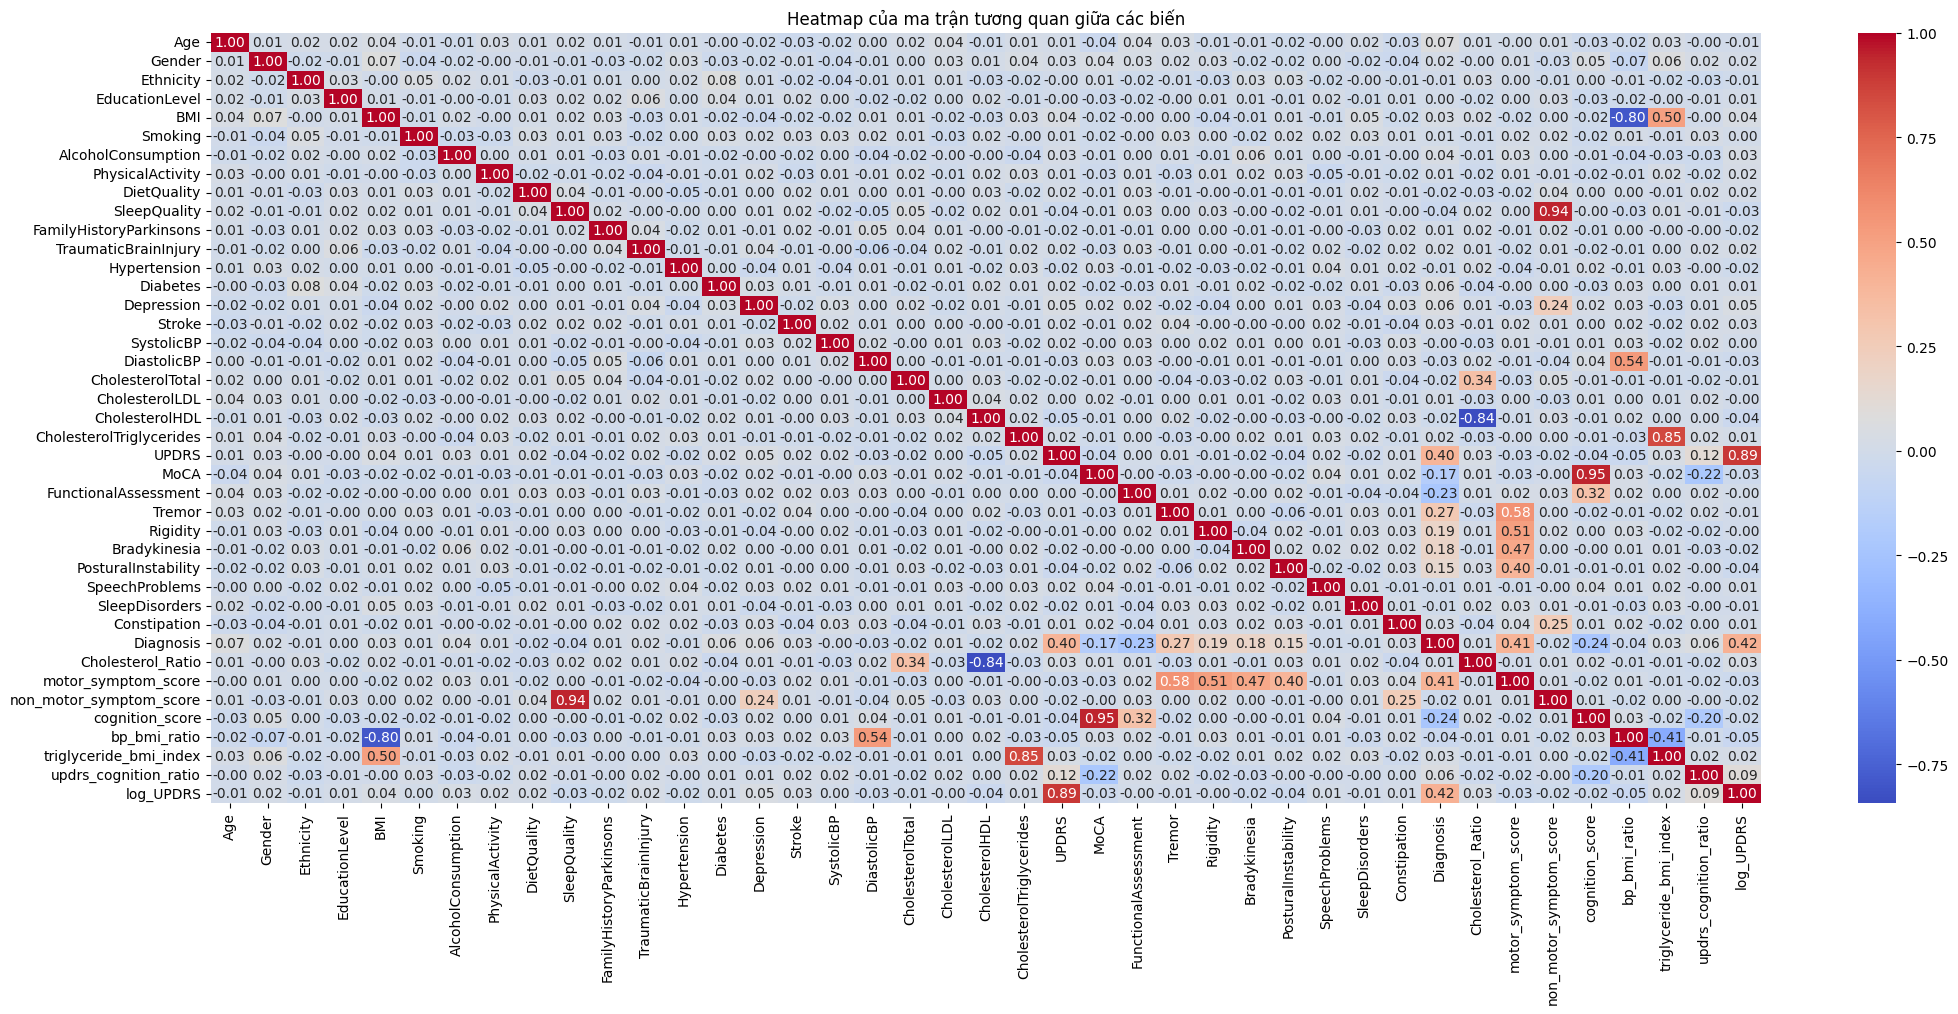

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ cột không liên quan
df_numeric = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Vẽ heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap của ma trận tương quan giữa các biến")
plt.show()

Chẩn đoán Parkinson có mối tương quan mạnh với triệu chứng vận động (Tremor, Rigidity, Bradykinesia, Postural Instability), motor_symptom_score, UPDRS, và log_UPDRS, phản ánh mức độ nghiêm trọng của bệnh. MoCA và cognition_score có tương quan âm, cho thấy suy giảm nhận thức thường gặp ở bệnh nhân Parkinson. FunctionalAssessment cũng liên kết với chẩn đoán, với điểm thấp hơn phản ánh mức độ suy giảm chức năng nghiêm trọng hơn

Các thuộc tính sau có mức tương quan rất thấp: Ethnicity, EducationLevel, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality,FamilyHistoryParkinsons, TraumaticBrainInjury, Hypertension, CholesterolTotal, CholesterolLDL, CholesterolHDL, SpeechProblems, SleepDisorders, SystolicBP, Cholesterol_Ratio, non_motor_symptom_score, bp_bmi_ratio, triglyceride_bmi_index, updrs_cognition_ratio .

Những thuộc tính này gần như không có mối quan hệ tuyến tính với Diagnosis, nên chúng khó có đóng góp rõ rệt khi huấn luyện các mô hình dựa trên tương quan (như hồi quy tuyến tính, logistic, v.v.). Tuy nhiên, nếu sử dụng các mô hình phi tuyến (như Random Forest, XGBoost…), thì một số thuộc tính này vẫn có thể giữ lại để kiểm tra mức độ đóng góp sau qua feature importance.

In [12]:
from sklearn.feature_selection import f_classif

# Tách features (X) và target (y)
X = df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = df['Diagnosis']

# Tính ANOVA F-test
f_values, p_values = f_classif(X, y)

# Gộp kết quả vào một DataFrame
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_values,
    'p-Value': p_values
})

# Sắp xếp theo F-Score giảm dần
anova_results = anova_results.sort_values(by='F-Score', ascending=False)

print(anova_results)

                     Feature     F-Score       p-Value
39                 log_UPDRS  457.254903  5.878831e-92
33       motor_symptom_score  421.972735  1.319822e-85
22                     UPDRS  395.838664  7.642746e-81
25                    Tremor  171.198816  1.148249e-37
35           cognition_score  124.626554  3.735911e-28
24      FunctionalAssessment  112.179225  1.420693e-25
26                  Rigidity   75.036727  9.040693e-18
27              Bradykinesia   73.728859  1.714317e-17
23                      MoCA   64.962823  1.266828e-15
28       PosturalInstability   46.783583  1.035663e-11
0                        Age    9.017951  2.704923e-03
38     updrs_cognition_ratio    8.591866  3.413110e-03
14                Depression    7.366215  6.700322e-03
13                  Diabetes    6.871033  8.823525e-03
9               SleepQuality    3.949442  4.701643e-02
36              bp_bmi_ratio    3.249194  7.160171e-02
6         AlcoholConsumption    2.836153  9.231300e-02
4         

Các thuộc tính có ý nghĩa thống kê cao (p-value < 0.05):  
Quan trọng: UPDRS, Tremor, FunctionalAssessment, Rigidity, Bradykinesia, MoCA, PosturalInstability.  
Ảnh hưởng vừa: Age, Depression, Diabetes, SleepQuality.

Các thuộc tính không có ý nghĩa thống kê (p-value ≥ 0.05): EducationLevel, Ethnicity, Smoking, CholesterolLDL, Hypertension, PhysicalActivity, SpeechProblems, SleepDisorders, FamilyHistoryParkisons, SystolicBP, Cholesterol_Ratio.

In [13]:
cols_to_drop = ['PatientID', 'DoctorInCharge',  'EducationLevel', 'Ethnicity', 'Smoking', 'CholesterolLDL', 'Hypertension', 'PhysicalActivity', 'SpeechProblems', 
                'SleepDisorders', 'FamilyHistoryParkinsons', 'SystolicBP', 'Cholesterol_Ratio']
df_selected = df.drop(columns=cols_to_drop)
print("Số cột sau khi chọn lọc:", len(df_selected.columns))
print(df_selected.columns.tolist())

Số cột sau khi chọn lọc: 30
['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'DietQuality', 'SleepQuality', 'TraumaticBrainInjury', 'Diabetes', 'Depression', 'Stroke', 'DiastolicBP', 'CholesterolTotal', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'Constipation', 'Diagnosis', 'motor_symptom_score', 'non_motor_symptom_score', 'cognition_score', 'bp_bmi_ratio', 'triglyceride_bmi_index', 'updrs_cognition_ratio', 'log_UPDRS']


# Chuẩn hóa dữ liệu

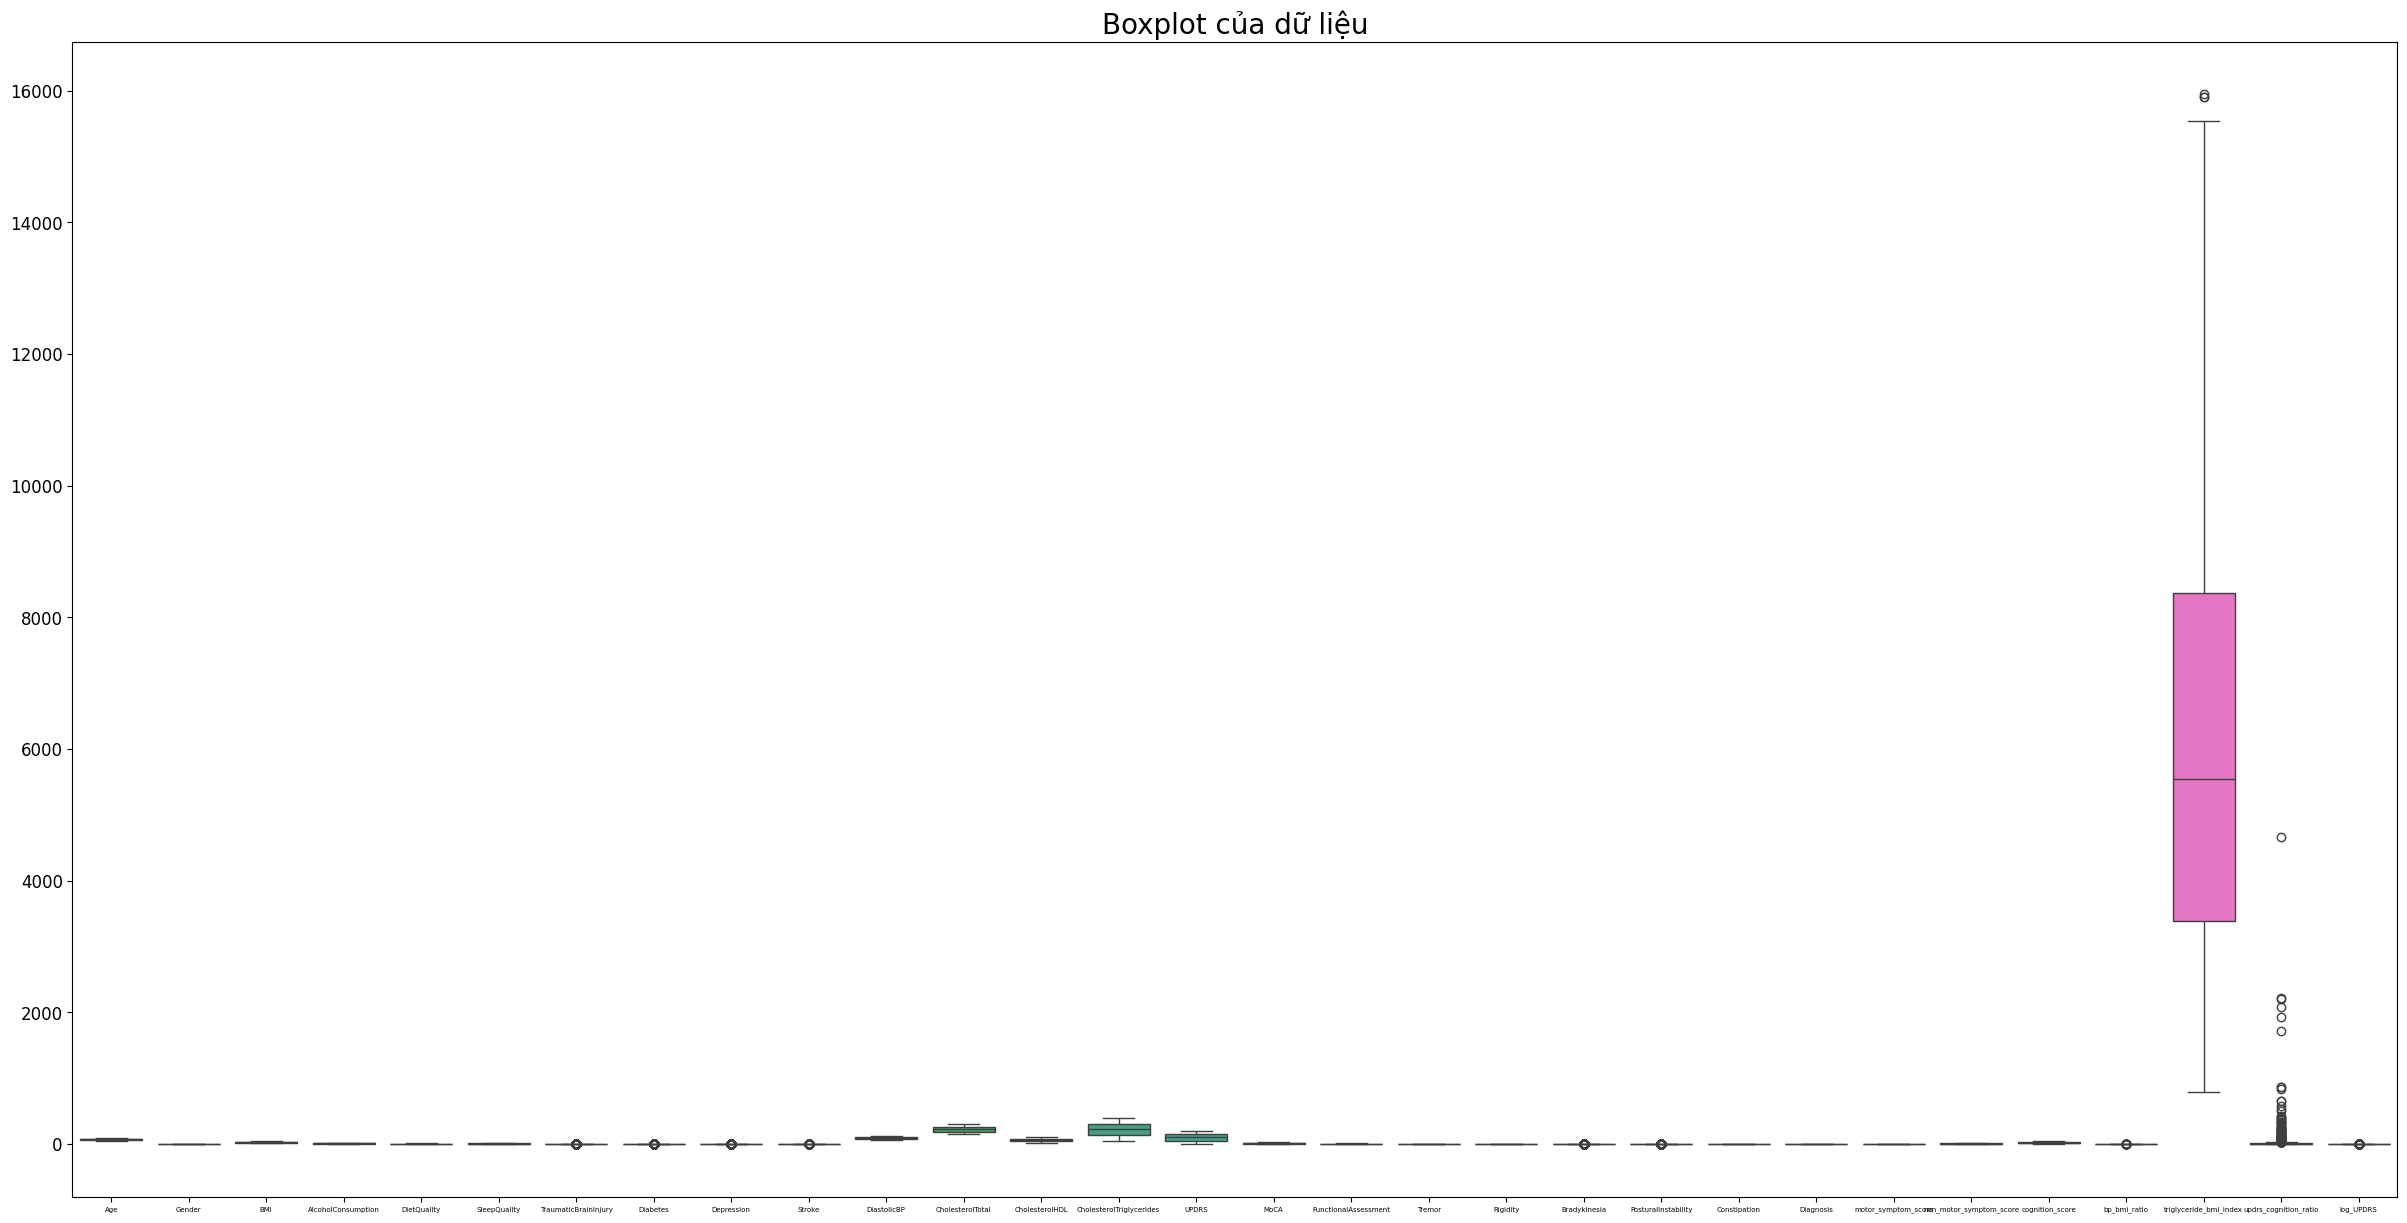

In [14]:
plt.figure(figsize=(30, 15)) 
sns.boxplot(data=df_selected)
plt.xticks(fontsize=5)  
plt.yticks(fontsize=12)  
plt.title("Boxplot của dữ liệu", fontsize=20)  
plt.show()

In [15]:
# Thống kê nhanh các dữ liệu số trong DataFrame sau khi chọn lọc
print(df_selected.describe())

               Age       Gender          BMI  AlcoholConsumption  DietQuality  \
count  2105.000000  2105.000000  2105.000000         2105.000000  2105.000000   
mean     69.601900     0.492637    27.209493           10.040413     4.912901   
std      11.594511     0.500065     7.208099            5.687014     2.872115   
min      50.000000     0.000000    15.008333            0.002228     0.000011   
25%      60.000000     0.000000    20.782176            5.150278     2.478503   
50%      70.000000     0.000000    27.184571           10.070337     4.825187   
75%      80.000000     1.000000    33.462452           14.829565     7.381487   
max      89.000000     1.000000    39.999887           19.988866     9.995864   

       SleepQuality  TraumaticBrainInjury     Diabetes   Depression  \
count   2105.000000           2105.000000  2105.000000  2105.000000   
mean       6.996639              0.106413     0.148219     0.205226   
std        1.753065              0.308439     0.355401   

Từ biểu đồ boxplot và phần thống kê nhanh, ta có thể thấy dữ liệu nằm trong khoảng cố định rõ ràng, không có giá trị ngoại lai lớn. Vì vậy, ta dùng phương pháp Min-Max Scaling để chuẩn hóa dữ liệu

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Áp dụng cho toàn bộ các cột còn lại (giả sử tất cả là dạng số)
normalized_cols = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'DietQuality', 'SleepQuality', 'TraumaticBrainInjury', 'Diabetes', 'Depression', 'Stroke', 
                   'DiastolicBP', 'CholesterolTotal', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity',
                   'Bradykinesia', 'PosturalInstability', 'Constipation', 'motor_symptom_score', 'non_motor_symptom_score', 'cognition_score', 
                   'bp_bmi_ratio', 'triglyceride_bmi_index', 'updrs_cognition_ratio', 'log_UPDRS']

# Áp dụng MinMaxScaler cho các cột đã chọn
df_selected[normalized_cols] = scaler.fit_transform(df_selected[normalized_cols])

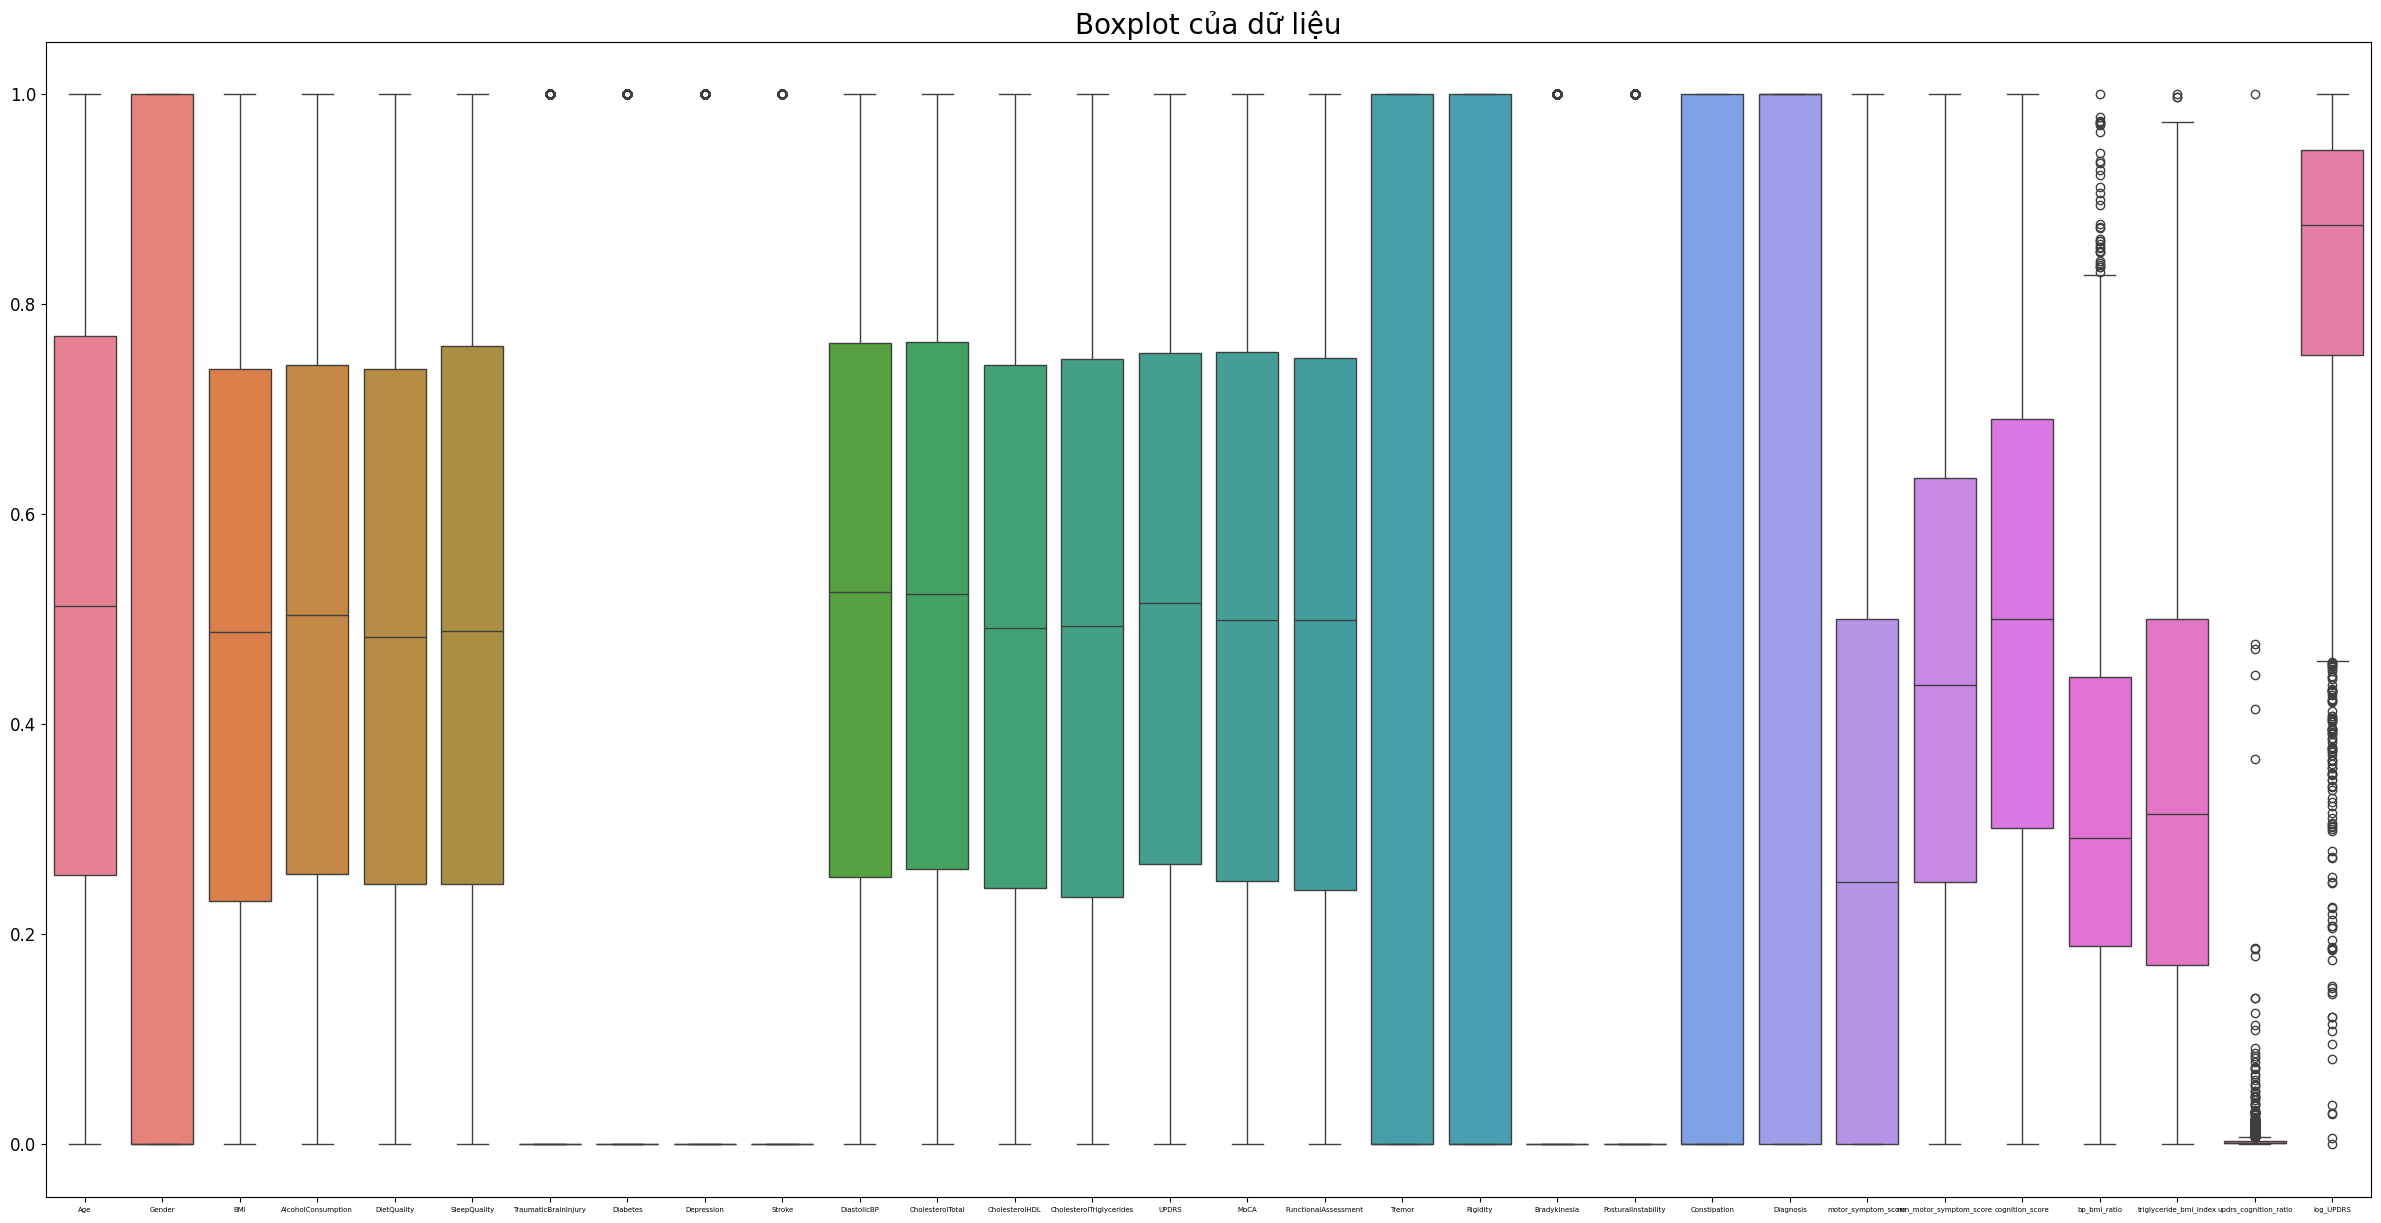

In [18]:
plt.figure(figsize=(30, 15)) 
sns.boxplot(data=df_selected)
plt.xticks(fontsize=5)  
plt.yticks(fontsize=12)  
plt.title("Boxplot của dữ liệu", fontsize=20)  
plt.show()

# Chia tập train và tập test

In [19]:
from sklearn.model_selection import train_test_split

X = df_selected.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

print('Kích thước tập train: ', train.shape)
print('Kích thước tập test: ', test.shape)

Kích thước tập train:  (1684, 30)
Kích thước tập test:  (421, 30)


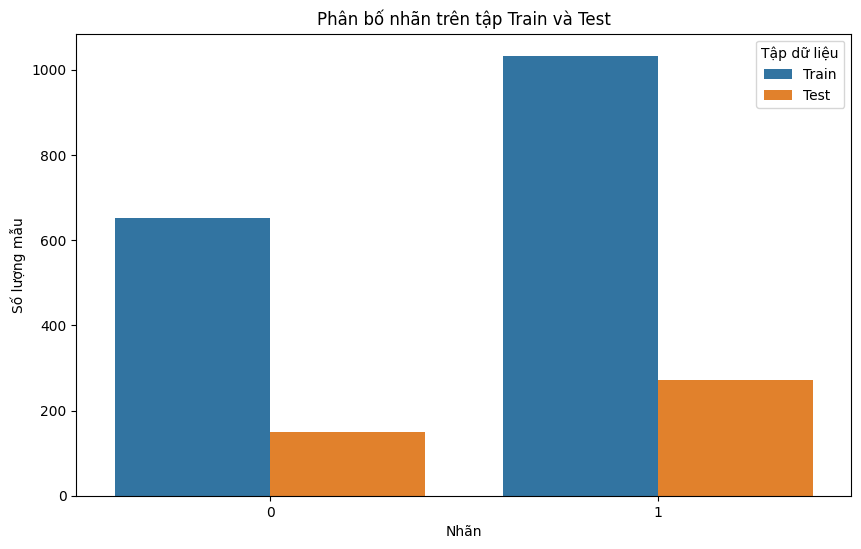

In [21]:
# Đếm số lượng nhãn trên từng tập
train_counts = y_train.value_counts().reset_index()
train_counts.columns = ["Diagnosis", "count"]
train_counts["dataset"] = "Train"

test_counts = y_test.value_counts().reset_index()
test_counts.columns = ["Diagnosis", "count"]
test_counts["dataset"] = "Test"

# Gộp dữ liệu
data_counts = pd.concat([train_counts, test_counts])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x="Diagnosis", y="count", hue="dataset", data=data_counts)

plt.xlabel("Nhãn")
plt.ylabel("Số lượng mẫu")
plt.title("Phân bố nhãn trên tập Train và Test")
plt.legend(title="Tập dữ liệu")

plt.show()

# Train Model

## Logistic Regression

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo mô hình
logreg = LogisticRegression()

# Định nghĩa các giá trị tham số cần tối ưu
param_grid = [
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 500]},
    {'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 500]}
]


# Khởi tạo GridSearchCV
grid_search_log = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Thực hiện tìm kiếm
grid_search_log.fit(X_train, y_train)

y_pred = grid_search_log.best_estimator_.predict(X_test)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search_log.best_params_)
print("Best accuracy:", grid_search_log.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy: 0.8444326692101172
Test Accuracy: 0.8218527315914489
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       150
           1       0.86      0.86      0.86       271

    accuracy                           0.82       421
   macro avg       0.81      0.81      0.81       421
weighted avg       0.82      0.82      0.82       421



C:\Users\Hp X2 G3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## SVM

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters: {'C': 100, 'kernel': 'linear'}
Best accuracy: 0.8503726861664548
Test accuracy: 0.8218527315914489

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       150
           1       0.86      0.86      0.86       271

    accuracy                           0.82       421
   macro avg       0.81      0.81      0.81       421
weighted avg       0.82      0.82      0.82       421



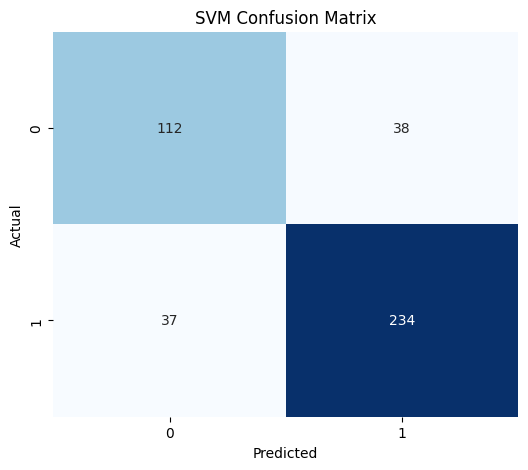

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Khởi tạo và huấn luyện mô hình SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Định nghĩa các tham số cần tối ưu
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': [0.001, 0.01, 0.1],
        'coef0': [0, 1]
    }
]

# Khởi tạo GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Huấn luyện mô hình với các tham số tốt nhất
y_pred_best = grid_search_svm.best_estimator_.predict(X_test)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search_svm.best_params_)
print("Best accuracy:", grid_search_svm.best_score_)
print("Test accuracy:", accuracy_score(y_test, y_pred))

# Báo cáo phân loại chi tiết
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

In [32]:
df['DoctorInCharge'].unique()

array(['DrXXXConfid'], dtype=object)

In [33]:
df = df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.9305214073760067
Test Accuracy: 0.9334916864608076

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       150
           1       0.96      0.94      0.95       271

    accuracy                           0.93       421
   macro avg       0.93      0.93      0.93       421
weighted avg       0.93      0.93      0.93       421



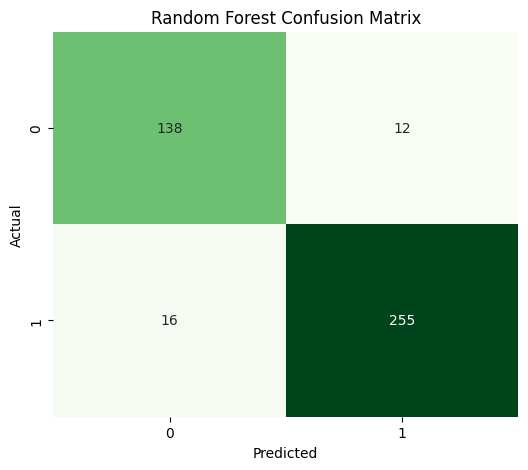

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Định nghĩa lưới tham số cần tìm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Huấn luyện
grid_search_rf.fit(X_train, y_train)

# Dự đoán
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Kết quả
print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV Accuracy:", grid_search_rf.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Bảng tổng hợp chỉ số của mô hình

In [53]:
models = {
    "Logistic Regression": grid_search_log.best_estimator_,
    "SVM": grid_search_svm.best_estimator_,
    "Random Forest": grid_search_rf.best_estimator_
}

In [58]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd
from tabulate import tabulate
summary = {}

for name, model in models.items():
    # Dự đoán
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    summary[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }

df_summary = pd.DataFrame(summary).T  
print("\nTổng kết kết quả các mô hình:\n")
print(tabulate(df_summary, headers='keys', tablefmt='fancy_grid'))


Tổng kết kết quả các mô hình:

╒═════════════════════╤════════════╤════════════╤══════════╕
│                     │   Accuracy │   F1 Score │      AUC │
╞═════════════════════╪════════════╪════════════╪══════════╡
│ Logistic Regression │   0.821853 │   0.861878 │ 0.897884 │
├─────────────────────┼────────────┼────────────┼──────────┤
│ SVM                 │   0.824228 │   0.862454 │ 0.900713 │
├─────────────────────┼────────────┼────────────┼──────────┤
│ Random Forest       │   0.933492 │   0.947955 │ 0.957811 │
╘═════════════════════╧════════════╧════════════╧══════════╛


ROC Curve so sánh 3 mô hình

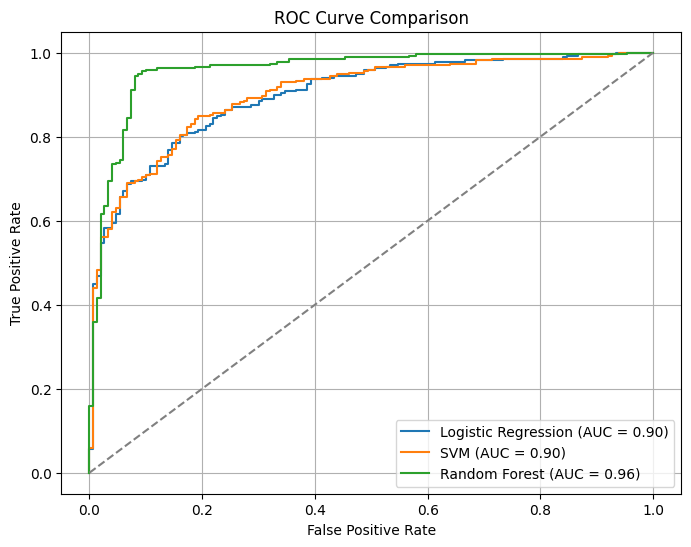

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': grid_search_log.best_estimator_, 
    'SVM': grid_search_svm.best_estimator_,  
    'Random Forest': grid_search_rf.best_estimator_
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()